<a href="https://colab.research.google.com/github/OmKadu786/MajorProject2-DataScience-LoanApprovalPrediction/blob/main/MajorProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2:
Classification – Predicting Loan Approval

Objective
Classify whether a person’s loan application will be approved based on socio-economic and credit-related factors.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
#1. Load & Explore Dataset

df = pd.read_csv("loan_approval_dataset.csv")
print(df.columns)
#loan_status is our target variable

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [ ]:
#2. Data Cleaning & Preprocessing

df.isnull().sum()
#no null vals

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
#all columns in this dataset have a space infront of them, to fix that we must rename columns

df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
#Handle class imbalance (if any)
for col in df.columns:
  if df[col].dtype == 'int64':
    print(f"---- {col} ----")
    print(df[col].value_counts())

#there is no imbalance in set


---- loan_id ----
loan_id
4269    1
1       1
2       1
3       1
4       1
       ..
18      1
17      1
16      1
15      1
14      1
Name: count, Length: 4269, dtype: int64
---- no_of_dependents ----
no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64
---- income_annum ----
income_annum
7000000    62
4100000    59
7600000    57
4700000    56
5300000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name: count, Length: 98, dtype: int64
---- loan_amount ----
loan_amount
10600000    27
20000000    24
9400000     24
23900000    23
16800000    23
            ..
33400000     1
36600000     1
33800000     1
37700000     1
36100000     1
Name: count, Length: 378, dtype: int64
---- loan_term ----
loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64
---- cibil_score ----
cibil_score
348    16
543    15
538    15
415    14
439 

In [ ]:
#3. Exploratory Data Analysis (EDA)

df['education'] = df['education'].str.strip().str.lower()
df['loan_status'] = df['loan_status'].str.strip().str.lower()

graduates = df[df['education'] == 'graduate']
non_graduates = df[df['education'] == 'not graduate']

grad_loan_percent = (graduates['loan_status'].value_counts(normalize=True).get('approved', 0)) * 100
nongrad_loan_percent = (non_graduates['loan_status'].value_counts(normalize=True).get('approved', 0)) * 100

print(f"% of Graduates who got loan approved: {grad_loan_percent:.2f}%")
print(f"% of Non-Graduates who got loan approved: {nongrad_loan_percent:.2f}%")
print("---------------------------")

df['self_employed'] = df['self_employed'].str.strip().str.lower()

self_employed = df[df['self_employed'] == 'yes']
not_self_employed = df[df['self_employed'] == 'no']

self_employed_percent = (self_employed['loan_status'].value_counts(normalize=True).get('approved', 0)) * 100
not_self_employed_percent = (not_self_employed['loan_status'].value_counts(normalize=True).get('approved', 0)) * 100

print(f"% of self employed who got loan approved: {self_employed_percent:.2f}%")
print(f"% of Non-self employed who got loan approved: {not_self_employed_percent:.2f}%")
print("---------------------------")


% of Graduates who got loan approved: 62.45%
% of Non-Graduates who got loan approved: 61.98%
---------------------------
% of self employed who got loan approved: 62.23%
% of Non-self employed who got loan approved: 62.20%
---------------------------


In [ ]:
df.columns = df.columns.str.strip().str.lower()

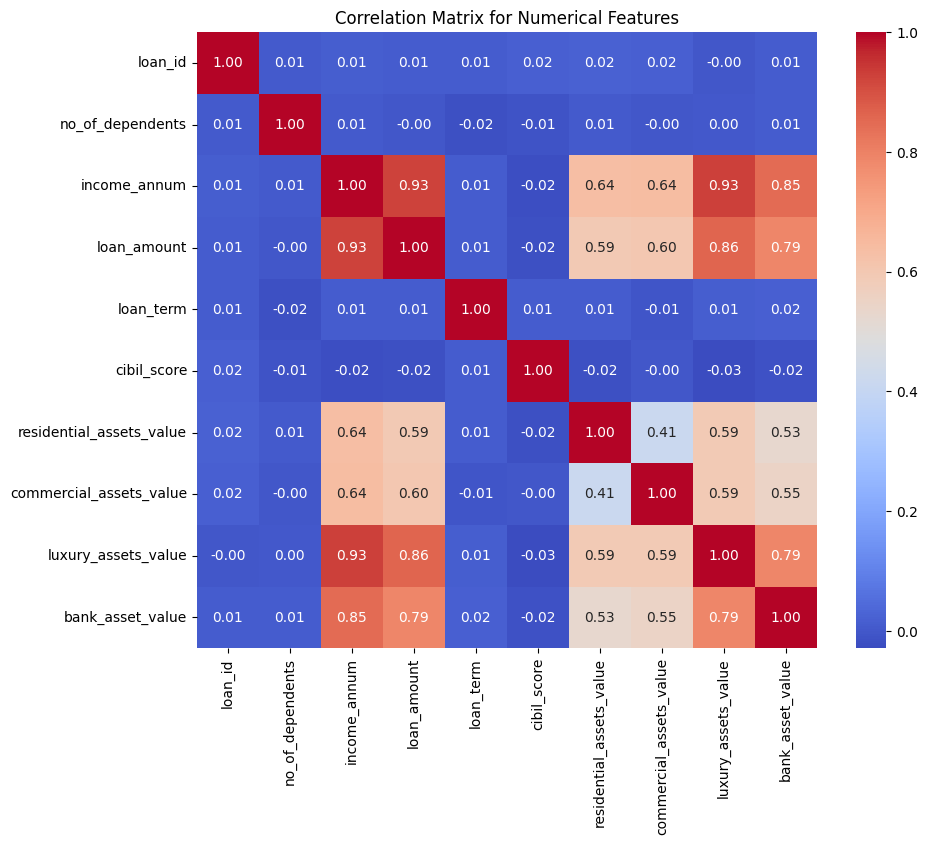

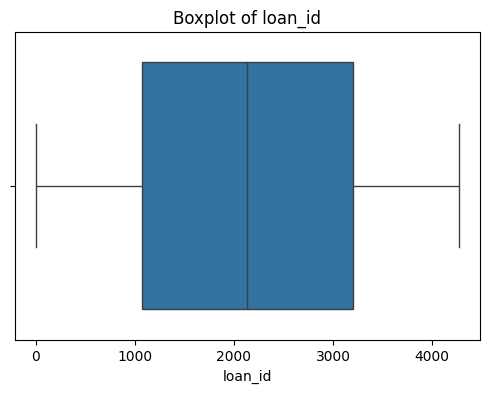

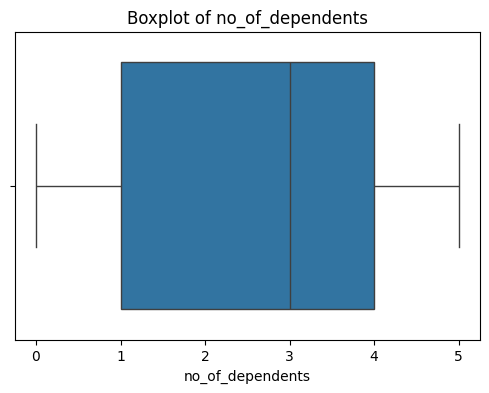

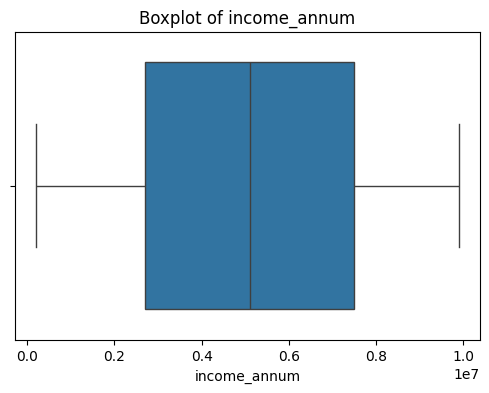

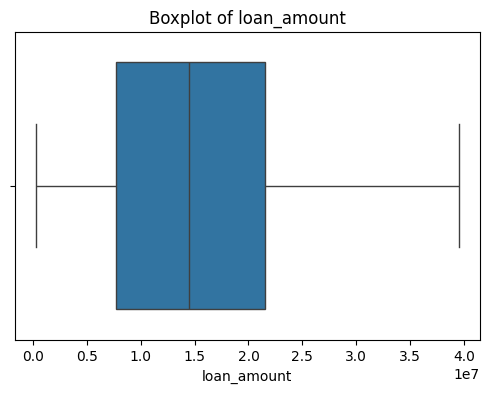

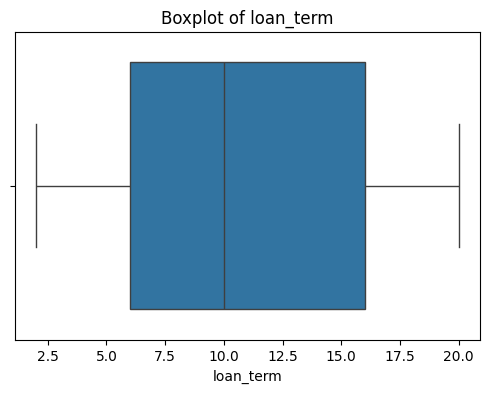

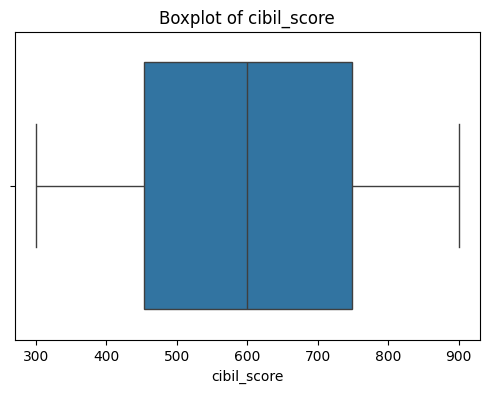

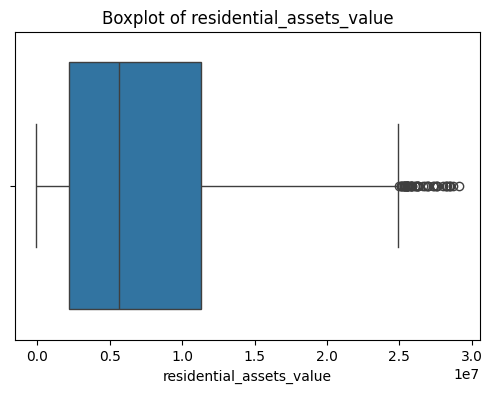

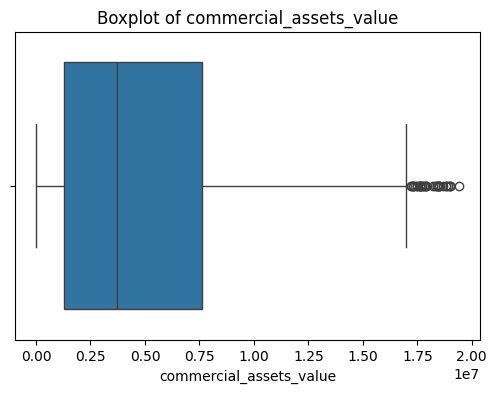

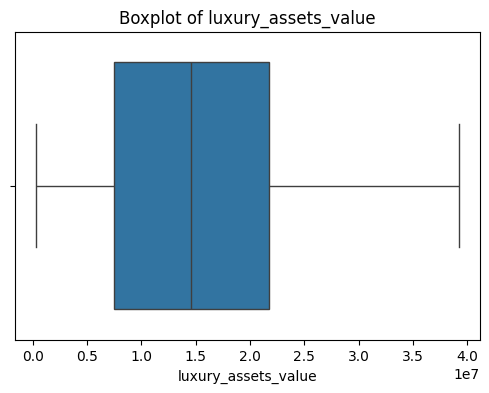

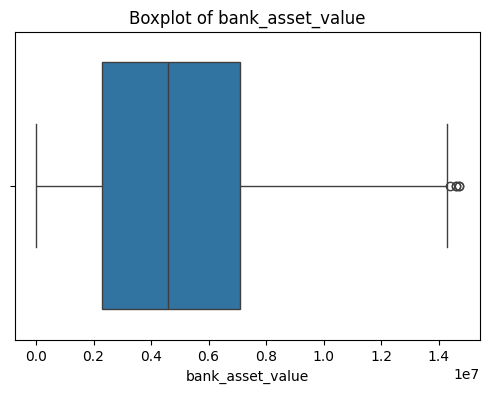

In [ ]:
import seaborn as sns

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# compute correlation matrix
corr_matrix = numeric_df.corr()

# plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

for col in numeric_df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
#4. Model Building

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

# encode target variable (loan_status: approved → 1, rejected → 0)
df['loan_status'] = df['loan_status'].map({'approved': 1, 'rejected': 0})

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42)
}

#evaluation
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.907494   0.920810  0.932836  0.926784
1        Decision Tree  0.974239   0.981273  0.977612  0.979439
2        Random Forest  0.980094   0.983240  0.985075  0.984157
3                  SVM  0.935597   0.959847  0.936567  0.948064


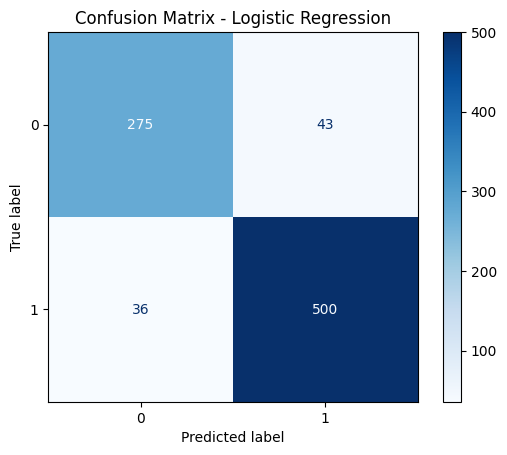

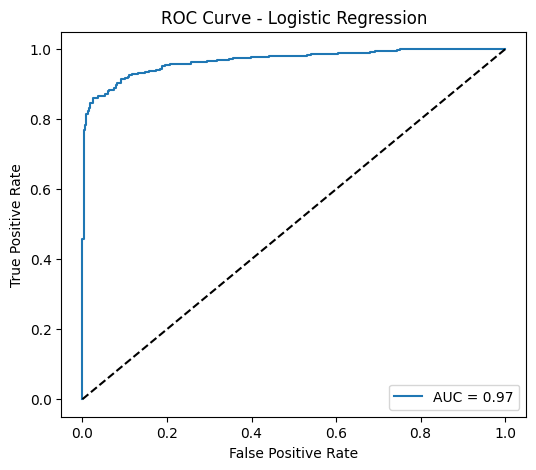

Logistic Regression ROC-AUC Score: 0.967


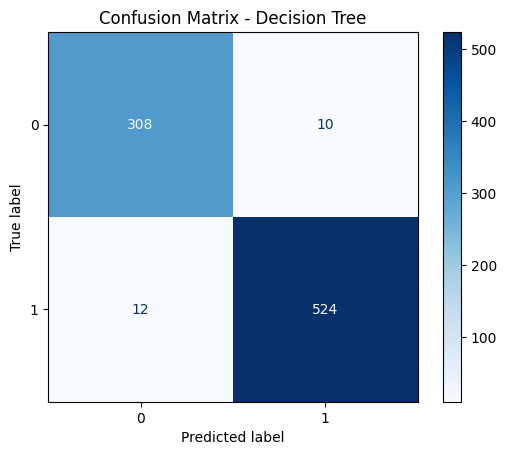

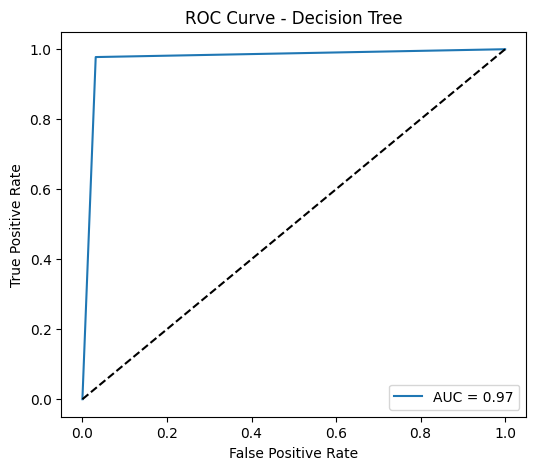

Decision Tree ROC-AUC Score: 0.973


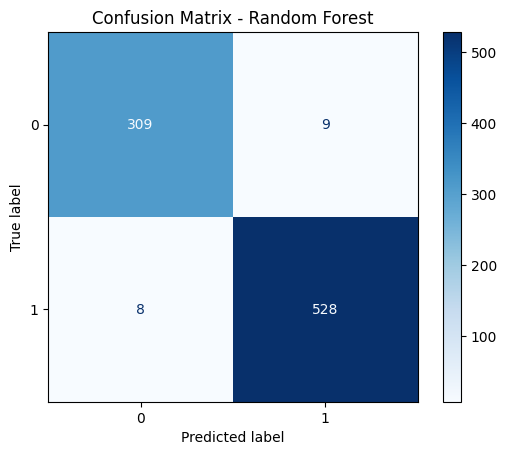

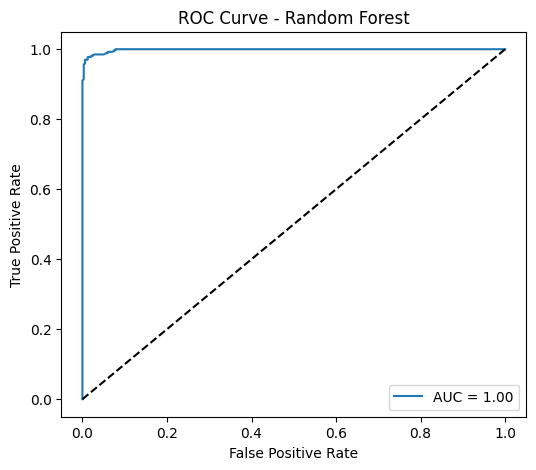

Random Forest ROC-AUC Score: 0.999


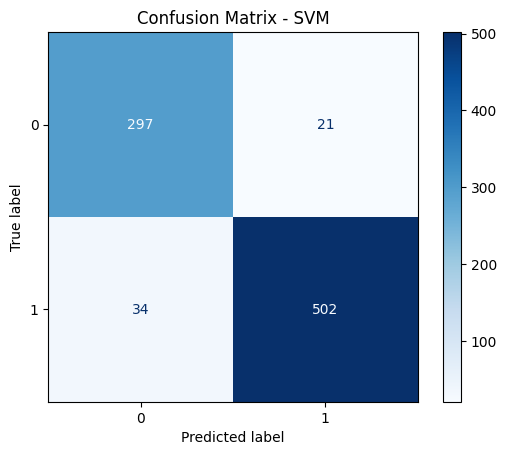

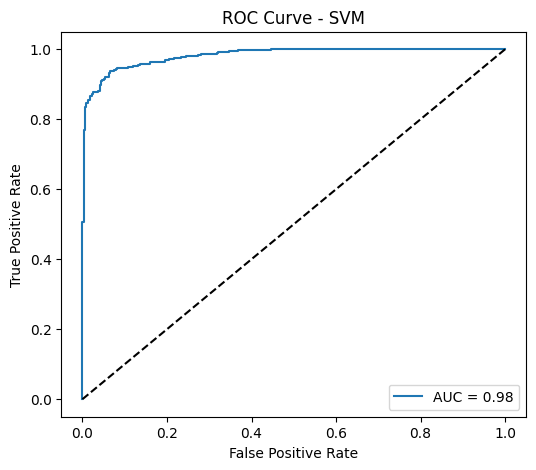

SVM ROC-AUC Score: 0.982


In [ ]:
#5. Model Evaluation

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# eval each model visually and with roc-auc
for name, model in models.items():
    # predictions
    y_pred = model.predict(X_test)

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # roc curve
    # for models that can output probabilities
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # for svm without probability=true, use decision_function
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.show()

    print(f"{name} ROC-AUC Score: {auc_score:.3f}")


Model Performance Summary:
                 Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest  0.980094   0.983240  0.985075  0.984157
1        Decision Tree  0.974239   0.981273  0.977612  0.979439
3                  SVM  0.935597   0.959847  0.936567  0.948064
0  Logistic Regression  0.907494   0.920810  0.932836  0.926784

Final Comparison Table:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
2        Random Forest  0.980094   0.983240  0.985075  0.984157  0.998527
3                  SVM  0.935597   0.959847  0.936567  0.948064  0.982012
1        Decision Tree  0.974239   0.981273  0.977612  0.979439  0.973083
0  Logistic Regression  0.907494   0.920810  0.932836  0.926784  0.967386


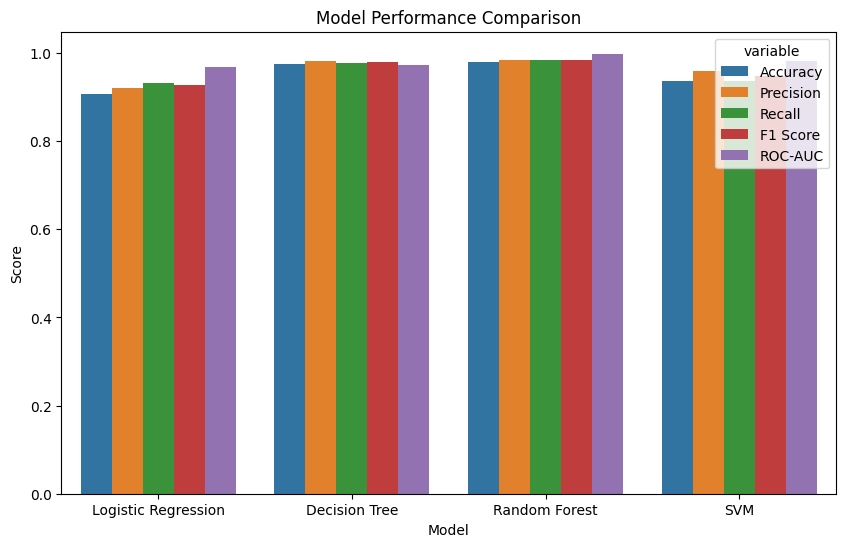


✅ Best Performing Model: Random Forest
Accuracy: 0.980, F1: 0.984, ROC-AUC: 0.999

Interpretation:
The Random Forest achieved the highest ROC-AUC, meaning it can best distinguish between approved and rejected loans. In practice, a bank could use this model to:
1️⃣ Automatically pre-screen loan applications before manual review.
2️⃣ Identify low-risk applicants with high approval probability.
3️⃣ Flag high-risk applications for additional documentation or verification.
4️⃣ Reduce default rates by focusing on applicants with stronger financial indicators.

This model helps improve decision consistency, processing speed, and reduces human bias.


In [ ]:
# 6. Model Comparison & Interpretation

# comp all model metrics
print("Model Performance Summary:")
print(results_df.sort_values(by="Accuracy", ascending=False))

# Store roc-auc scores for all models
auc_scores = {}
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    auc_scores[name] = roc_auc_score(y_test, y_prob)

# add roc-auc column to results_df
results_df["ROC-AUC"] = results_df["Model"].map(auc_scores)
print("\nFinal Comparison Table:")
print(results_df.sort_values(by="ROC-AUC", ascending=False))

# comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']),
            x='Model', y='value', hue='variable')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

# identify best model
best_model = results_df.sort_values(by="ROC-AUC", ascending=False).iloc[0]
print(f"\n✅ Best Performing Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']:.3f}, F1: {best_model['F1 Score']:.3f}, ROC-AUC: {best_model['ROC-AUC']:.3f}")

# interpretation
print("\nInterpretation:")
print(f"The {best_model['Model']} achieved the highest ROC-AUC, meaning it can best distinguish "
      f"between approved and rejected loans. In practice, a bank could use this model to:")
print("1️⃣ Automatically pre-screen loan applications before manual review.")
print("2️⃣ Identify low-risk applicants with high approval probability.")
print("3️⃣ Flag high-risk applications for additional documentation or verification.")
print("4️⃣ Reduce default rates by focusing on applicants with stronger financial indicators.")
print("\nThis model helps improve decision consistency, processing speed, and reduces human bias.")
